In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# 1. 读取CSV文件
file_path = r'full_fwd_results_384.csv'  # 替换为你的CSV文件路径
data = pd.read_csv(file_path)

block384_seqlen = data[(data['block_size']==384) & (data['num_heads']==1) & (data['batch_size']==1)]['seq_len'].tolist()

torch_flex_generate_masks = data[(data['block_size']==384) & (data['num_heads']==1) & (data['batch_size']==1)]['torch_flex_generate_masks'].tolist(),
torch_flex_executes = data[(data['block_size']==384) & (data['num_heads']==1) & (data['batch_size']==1)]['torch_flex_executes'].tolist(),
torch_generate_masks = data[(data['block_size']==384) & (data['num_heads']==1) & (data['batch_size']==1)]['torch_generate_masks'].tolist(),
torch_attn_executes = data[(data['block_size']==384) & (data['num_heads']==1) & (data['batch_size']==1)]['torch_attn_executes'].tolist(),
magi_generate_masks = data[(data['block_size']==384) & (data['num_heads']==1) & (data['batch_size']==1)]['magi_generate_masks'].tolist(),
magi_executes = data[(data['block_size']==384) & (data['num_heads']==1) & (data['batch_size']==1)]['magi_executes'].tolist(),
ptm_attn_masks = data[(data['block_size']==384) & (data['num_heads']==1) & (data['batch_size']==1)]['ptm_attn_masks'].tolist(),
ptm_attn_executes = data[(data['block_size']==384) & (data['num_heads']==1) & (data['batch_size']==1)]['ptm_attn_executes'].tolist(),
flash_attn2_masks = data[(data['block_size']==384) & (data['num_heads']==1) & (data['batch_size']==1)]['flash_attn2_masks'].tolist(),
flash_attn2_executes = data[(data['block_size']==384) & (data['num_heads']==1) & (data['batch_size']==1)]['flash_attn2_executes'].tolist(),
flash_attn3_masks = data[(data['block_size']==384) & (data['num_heads']==1) & (data['batch_size']==1)]['flash_attn3_masks'].tolist(),
flash_attn3_executes = data[(data['block_size']==384) & (data['num_heads']==1) & (data['batch_size']==1)]['flash_attn3_executes'].tolist(),
sparge_masks = data[(data['block_size']==384) & (data['num_heads']==1) & (data['batch_size']==1)]['sparge_masks'].tolist(),
sparge_executes = data[(data['block_size']==384) & (data['num_heads']==1) & (data['batch_size']==1)]['sparge_attn_executes'].tolist(),

print(block384_seqlen)


[11520, 19200, 30720, 38400, 46080, 53760, 61440, 69120, 76800, 84480]


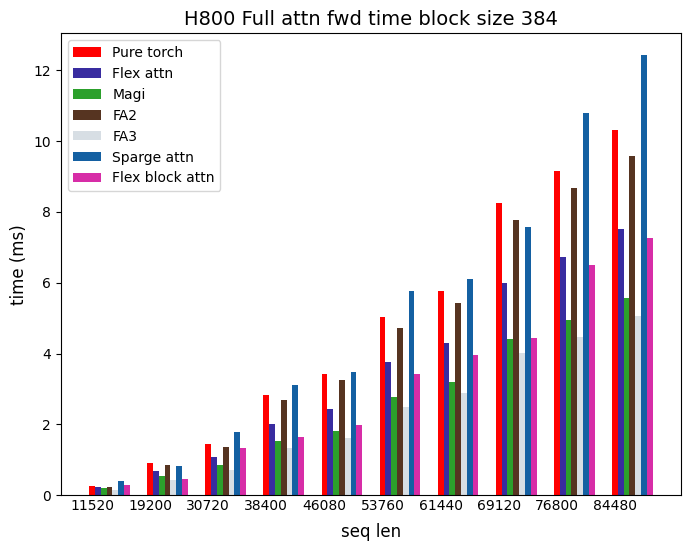

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 设置数据
# categories = ['A', 'B', 'C', 'D']  # 柱状图的类别
seq_len = block384_seqlen
categories = ['Pure torch', 'Flex attn', 'Magi', 'FA2', 'FA3', 'Sparge attn','Flex block attn']

colors = ['#FF0000', "#392CA0",'#2CA02C','#563421',"#D7DEE4", "#1460A2", "#D72DA7"]

# part1 = np.array([3, 5, 2, 7])     # 第一部分数据（红色）
# part2 = np.array([4, 2, 5, 1])     # 第二部分数据（黄色）
# part3 = np.array([2, 3, 3, 2])     # 第三部分数据（绿色）
data1 = {
    'generate mask': [torch_generate_masks,torch_flex_generate_masks,magi_generate_masks,flash_attn2_masks,flash_attn3_masks,sparge_masks,ptm_attn_masks],
    'execute':[torch_attn_executes,torch_flex_executes,magi_executes,flash_attn2_executes,flash_attn3_executes,sparge_executes,ptm_attn_executes],
}
# pure torch
part1 = data1['generate mask'][0][0]
part2 = data1['execute'][0][0]

# 创建图形
plt.figure(figsize=(8, 6))

bar_width = 0.1
x = np.arange(len(seq_len))

# 绘制堆叠柱状图
for i in range(7):
    if i==0:
        label1 = 'Generate mask'
        label2 = 'Execute'
    else:
        label1 = None
        label2 = None
    # if i==1:
    #     continue
    # bar1 = plt.bar(x+i*bar_width, data1['generate mask'][i][0], color='yellow', label=label1, width=bar_width)
    # plt.bar_label(bar1, label_type=categories[i], padding=-5)
    

    # bar2 = plt.bar(x+i*bar_width, data1['execute'][i][0], bottom=data1['generate mask'][i][0], color=colors[i], label=categories[i], width=bar_width)
    bar2 = plt.bar(x+i*bar_width, data1['execute'][i][0], bottom=0, color=colors[i], label=categories[i], width=bar_width)
    # plt.bar_label(bar2, label_type=categories[i], padding=-5)
    # x_index = bar1.patches[0].get_x() + bar1.patches[0].get_width()
    # plt.text(x[i]+i*bar_width, -1, categories[i], ha='center', va='top',fontsize=8)

# 添加标题和标签
plt.title('H800 Full attn fwd time block size 384', fontsize=14)
for i, category in enumerate(seq_len):
    plt.text(i, -0.1, f'{category}', ha='center', va='top')
plt.xlabel('seq len', fontsize=12,labelpad=20)
plt.ylabel('time (ms)', fontsize=12)
plt.xticks([])

# 添加图例
plt.legend()

# 显示图形
plt.show()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


# 1. 读取CSV文件
file_path = r'full_bwd_results_384.csv'  # 替换为你的CSV文件路径
data = pd.read_csv(file_path)

block384_seqlen = data[(data['block_size']==384) & (data['num_heads']==1) & (data['batch_size']==1)]['seq_len'].tolist()

flex_bwd_time = data[(data['block_size']==384) & (data['num_heads']==1) & (data['batch_size']==1)]['torch_flex_bwd'].tolist(),

torch_bwd_time = data[(data['block_size']==384) & (data['num_heads']==1) & (data['batch_size']==1)]['torch_attn_bwd'].tolist(),

magi_bwd_time = data[(data['block_size']==384) & (data['num_heads']==1) & (data['batch_size']==1)]['magi_attn_bwd'].tolist(),

ptm_bwd_time = data[(data['block_size']==384) & (data['num_heads']==1) & (data['batch_size']==1)]['ptm_attn_bwd'].tolist(),

fa2_bwd_times = data[(data['block_size']==384) & (data['num_heads']==1) & (data['batch_size']==1)]['fa2_bwd'].tolist(),

fa3_bwd_times = data[(data['block_size']==384) & (data['num_heads']==1) & (data['batch_size']==1)]['fa3_bwd'].tolist(),



print(block384_seqlen)


[11520, 19200, 30720, 38400, 46080, 53760, 61440, 69120, 76800, 84480]


no_pos:[np.float64(0.5), np.float64(1.5), np.float64(2.5), np.float64(3.5), np.float64(4.5), np.float64(5.5), np.float64(6.5), np.float64(7.5), np.float64(8.5), np.float64(9.5)]


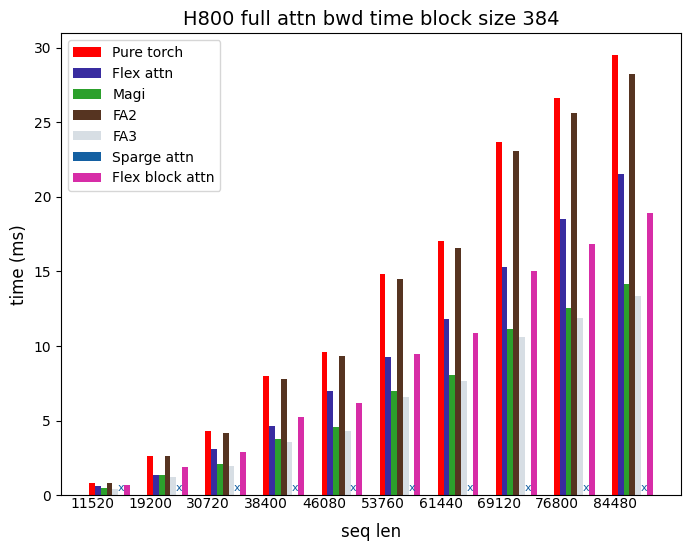

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 设置数据
# categories = ['A', 'B', 'C', 'D']  # 柱状图的类别
seq_len = block384_seqlen
categories = ['Pure torch', 'Flex attn', 'Magi', 'FA2', 'FA3', 'Sparge attn','Flex block attn']

colors = ['#FF0000', "#392CA0",'#2CA02C','#563421',"#D7DEE4", "#1460A2", "#D72DA7"]

# part1 = np.array([3, 5, 2, 7])     # 第一部分数据（红色）
# part2 = np.array([4, 2, 5, 1])     # 第二部分数据（黄色）
# part3 = np.array([2, 3, 3, 2])     # 第三部分数据（绿色）
# data1 = {
#     'generate mask': [torch_generate_masks,torch_flex_generate_masks,magi_generate_masks,flash_attn2_masks,flash_attn3_masks,ptm_attn_masks],
#     'execute':[torch_attn_executes,torch_flex_executes,magi_executes,flash_attn2_executes,flash_attn3_executes,ptm_attn_executes],
# }
sparge_bwd_time = None
data1 = {
    'bwd':[torch_bwd_time, flex_bwd_time, magi_bwd_time, fa2_bwd_times, fa3_bwd_times, sparge_bwd_time,ptm_bwd_time]
}
# pure torch
part1 = data1['bwd'][0][0]

# 创建图形
plt.figure(figsize=(8, 6))

bar_width = 0.1
x = np.arange(len(seq_len))
no_pos=[]
# 绘制堆叠柱状图
for i in range(7):
    # if i==0:
    #     label1 = 'bwd'
    #     label2 = 'bwd_without_warmup'
    # else:
    #     label1 = None
    #     label2 = None
    if data1['bwd'][i]==None:
        # tx = plt.text(x + i * bar_width, 0, '❌', fontsize=20, ha='center', va='bottom')
        bar1 = plt.bar(x+i*bar_width, 0, color=colors[i], label=categories[i], width=bar_width)
        no_pos.append(x+i*bar_width)
        

    else:
        bar1 = plt.bar(x+i*bar_width, data1['bwd'][i][0], color=colors[i], label=categories[i], width=bar_width)


# 添加标题和标签
plt.title('H800 full attn bwd time block size 384', fontsize=14)
for i, category in enumerate(seq_len):
    plt.text(i, -0.1, f'{category}', ha='center', va='top')

no_pos = list(no_pos[0])
print(f'no_pos:{no_pos}')
for item in no_pos:
    plt.text(item,0.5,"x",fontsize=8, color="#1460A2", ha='center', va='center')

plt.xlabel('seq len', fontsize=12,labelpad=20)
plt.ylabel('time (ms)', fontsize=12)
plt.xticks([])

# 添加图例
plt.legend()

# 显示图形
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# 1. 读取CSV文件
file_path = r'full_memory_results_384.csv'  # 替换为你的CSV文件路径
data = pd.read_csv(file_path)


block384_seqlen = data[(data['block_size']==384) & (data['num_heads']==1) & (data['batch_size']==1)]['seq_len'].tolist()

flex_fwd_memory = data[(data['block_size']==384) & (data['num_heads']==1) & (data['batch_size']==1)]['flex_fwd_memory'].tolist(),
flex_bwd_memory = data[(data['block_size']==384) & (data['num_heads']==1) & (data['batch_size']==1)]['flex_bwd_memory'].tolist(),

torch_fwd_memory = data[(data['block_size']==384) & (data['num_heads']==1) & (data['batch_size']==1)]['torch_fwd_memory'].tolist(),
torch_bwd_memory = data[(data['block_size']==384) & (data['num_heads']==1) & (data['batch_size']==1)]['torch_bwd_memory'].tolist(),

magi_fwd_memory = data[(data['block_size']==384) & (data['num_heads']==1) & (data['batch_size']==1)]['magi_fwd_memory'].tolist(),
magi_bwd_memory = data[(data['block_size']==384) & (data['num_heads']==1) & (data['batch_size']==1)]['magi_bwd_memory'].tolist(),

ptm_fwd_memory = data[(data['block_size']==384) & (data['num_heads']==1) & (data['batch_size']==1)]['ptm_fwd_memory'].tolist(),
ptm_bwd_memory = data[(data['block_size']==384) & (data['num_heads']==1) & (data['batch_size']==1)]['ptm_bwd_memory'].tolist(),


fa2_fwd_memory = data[(data['block_size']==384) & (data['num_heads']==1) & (data['batch_size']==1)]['fa2_fwd_memory'].tolist(),
fa2_bwd_memory = data[(data['block_size']==384) & (data['num_heads']==1) & (data['batch_size']==1)]['fa2_bwd_memory'].tolist(),

fa3_fwd_memory = data[(data['block_size']==384) & (data['num_heads']==1) & (data['batch_size']==1)]['fa3_fwd_memory'].tolist(),
fa3_bwd_memory = data[(data['block_size']==384) & (data['num_heads']==1) & (data['batch_size']==1)]['fa3_bwd_memory'].tolist(),

sparge_fwd_memory = data[(data['block_size']==384) & (data['num_heads']==1) & (data['batch_size']==1)]['sparge_fwd_memory'].tolist(),
print(block384_seqlen)


[11520, 19200, 30720, 38400, 46080, 53760, 61440, 69120, 76800, 84480]


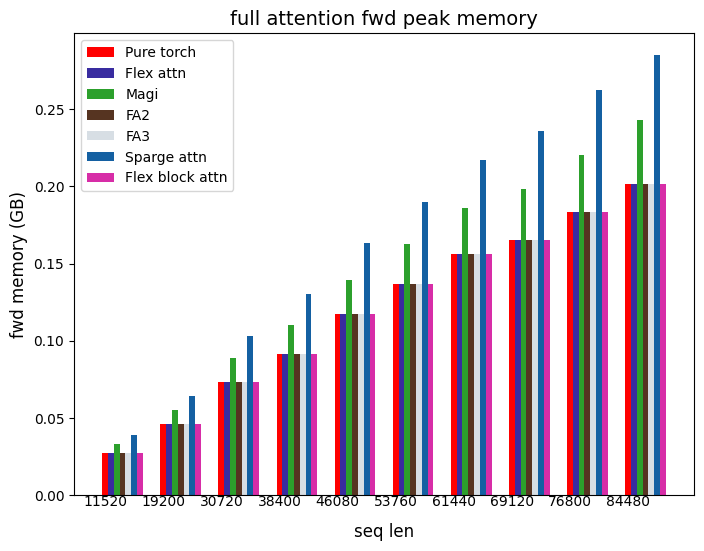

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 设置数据
# categories = ['A', 'B', 'C', 'D']  # 柱状图的类别
seq_len = block384_seqlen
categories = ['Pure torch', 'Flex attn', 'Magi', 'FA2', 'FA3', 'Sparge attn','Flex block attn']

colors = ['#FF0000', "#392CA0",'#2CA02C','#563421',"#D7DEE4", "#1460A2", "#D72DA7"]


data1 = {
    'fwd memory':[torch_fwd_memory, flex_fwd_memory, magi_fwd_memory, fa2_fwd_memory, fa3_fwd_memory, sparge_fwd_memory,ptm_fwd_memory]
}


# 创建图形
plt.figure(figsize=(8, 6))

bar_width = 0.1
x = np.arange(len(seq_len))

# 绘制堆叠柱状图
for i in range(7):

    bar1 = plt.bar(x+i*bar_width, [1.0*x/(1024*1024*1024) for x in data1['fwd memory'][i][0]], color=colors[i], label=categories[i], width=bar_width)


# 添加标题和标签
plt.title('H800 full atten fwd peak memory', fontsize=14)
for i, category in enumerate(seq_len):
    plt.text(i, 0, f'{category}', ha='center', va='top')
plt.xlabel('seq len', fontsize=12,labelpad=20)
plt.ylabel('fwd memory (GB)', fontsize=12)
plt.xticks([])

# 添加图例
plt.legend()

# 显示图形
plt.show()


no_pos:[np.float64(0.5), np.float64(1.5), np.float64(2.5), np.float64(3.5), np.float64(4.5), np.float64(5.5), np.float64(6.5), np.float64(7.5), np.float64(8.5), np.float64(9.5)]


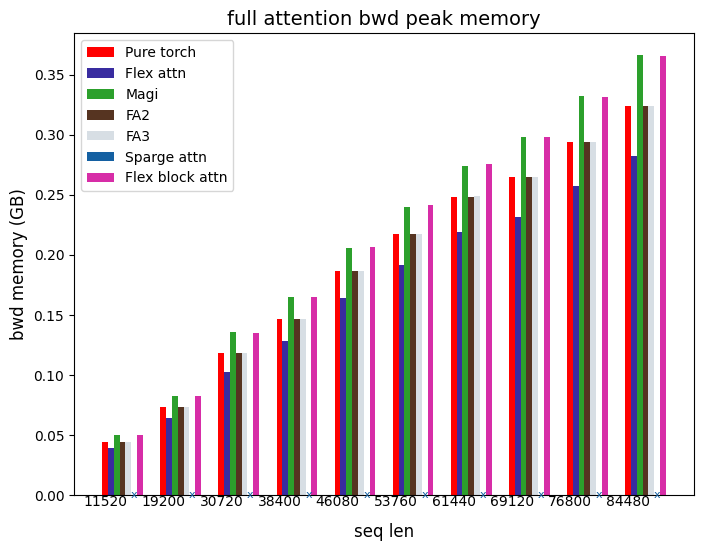

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 设置数据
# categories = ['A', 'B', 'C', 'D']  # 柱状图的类别
seq_len = block384_seqlen
categories = ['Pure torch', 'Flex attn', 'Magi', 'FA2', 'FA3', 'Sparge attn','Flex block attn']

colors = ['#FF0000', "#392CA0",'#2CA02C','#563421',"#D7DEE4", "#1460A2", "#D72DA7"]

sparge_bwd_memory = None

data1 = {
    'bwd memory':[torch_bwd_memory, flex_bwd_memory, magi_bwd_memory, fa2_bwd_memory, fa3_bwd_memory, sparge_bwd_memory,ptm_bwd_memory]
}


# 创建图形
plt.figure(figsize=(8, 6))

bar_width = 0.1
x = np.arange(len(seq_len))
no_pos=[]
# 绘制堆叠柱状图
for i in range(7):

    if data1['bwd memory'][i]==None:
        # tx = plt.text(x + i * bar_width, 0, '❌', fontsize=20, ha='center', va='bottom')
        bar1 = plt.bar(x+i*bar_width, 0, color=colors[i], label=categories[i], width=bar_width)
        no_pos.append(x+i*bar_width)
    else:
        bar1 = plt.bar(x+i*bar_width, [1.0*x/(1024*1024*1024) for x in data1['bwd memory'][i][0]], color=colors[i], label=categories[i], width=bar_width)


# 添加标题和标签
plt.title('H800 full atten bwd peak memory', fontsize=14)
for i, category in enumerate(seq_len):
    plt.text(i, 0, f'{category}', ha='center', va='top')

no_pos = list(no_pos[0])
print(f'no_pos:{no_pos}')
for item in no_pos:
    plt.text(item, 0,"x",fontsize=8, color="#1460A2", ha='center', va='center')

plt.xlabel('seq len', fontsize=12,labelpad=20)
plt.ylabel('bwd memory (GB)', fontsize=12)
plt.xticks([])

# 添加图例
plt.legend()

# 显示图形
plt.show()
